<a href="https://colab.research.google.com/github/KhushbooGupta2111/Data-Analysis-With-Automotive-Industry-Engage/blob/main/Electric_Vehicles_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [26]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


Importing Dataset

In [27]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
auto_data = pd.read_csv('gdrive/My Drive/Electric_Vehicles_India_Clean.csv')

Data Cleaning 

Function which removes all the values after the first spacebar in the column 🌻

Function Built for cleaning Delimiter 🌻

(Note: This just removes the extra units. For converting the values from string to integer, run the string_to_numeric function, which is mentioned below)

In [29]:
auto_data.isnull().sum()

Car                0
Style              0
Range              0
Transmission       0
VehicleType        0
PriceRange_Low     0
PriceRange_High    0
Capacity           0
BootSpace          0
BaseModel          0
TopModel           0
dtype: int64

In [30]:
auto_data.describe()

,Car,Style,Range,Transmission,VehicleType,PriceRange_Low,PriceRange_High,Capacity,BootSpace,BaseModel,TopModel
count,12,12,12,12,12,12,12,12,12,12,12
unique,12,7,12,1,1,12,12,2,10,11,12
top,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,13.99,17.4 L,5 Seater,350 L,STD,Dark XZ Plus LUX
freq,1,6,1,12,12,1,1,11,2,2,1


In [31]:
auto_data.shape

(12, 11)

In [32]:
# This function is used to eliminate the delimiter values in the columns
def unit_delimiter(column_name , removing_substring):
  auto_data[column_name] = auto_data[column_name].apply(str).str.replace(' ' + removing_substring , '');

Function Built for converting values from string to integer 🌻

(Note: Run this after you have executed the function unit_delimiter)

In [33]:
def string_to_numeric(column_name):
  auto_data[column_name] = auto_data[column_name].fillna(0)
  auto_data[column_name] = auto_data[column_name].replace("nan" , 0 , regex = True)
  auto_data[column_name] = pd.to_numeric(auto_data[column_name] )

A function which combines these 2 functions

In [34]:
def delimiter_and_numeric(column_name , removing_substring):
  unit_delimiter(column_name , removing_substring)
  string_to_numeric(column_name)

In [35]:
def all_before_space(column_name):
  auto_data[column_name] = auto_data[column_name].str.split(" " , n = 1 , expand = True)[0]

Function which replaces any extra character from the column 🌻

In [36]:
def replace_extra_characters(column_name , character , replacement = ''):
  auto_data[column_name] = auto_data[column_name].str.replace(character , replacement)

In [37]:
delimiter_and_numeric("Range" , "Km/Full Charge")

In [38]:
delimiter_and_numeric("Capacity" , "Seater")

In [39]:
replace_extra_characters("BootSpace" , "l" , "L")

In [40]:
auto_data["PriceRange_Low"] = auto_data["PriceRange_Low"].str.strip() 

In [41]:
replace_extra_characters("PriceRange_High" , "Cr" , "L")
replace_extra_characters("PriceRange_Low" , "Cr" , "L")

In [42]:
delimiter_and_numeric("PriceRange_High" , "L")
delimiter_and_numeric("PriceRange_Low" , "L")

Data Analysis


Which car gives the maximum range on full charge?

In [43]:
auto_data.max()

Car                   Tata Tigor EV
Style              Subcompact Sedan
Range                           471
Transmission              Automatic
VehicleType                Electric
PriceRange_Low                29.15
PriceRange_High               29.15
Capacity                          5
BootSpace                     660 L
BaseModel                 xDrive 40
TopModel                  xDrive 40
dtype: object

<BarContainer object of 12 artists>

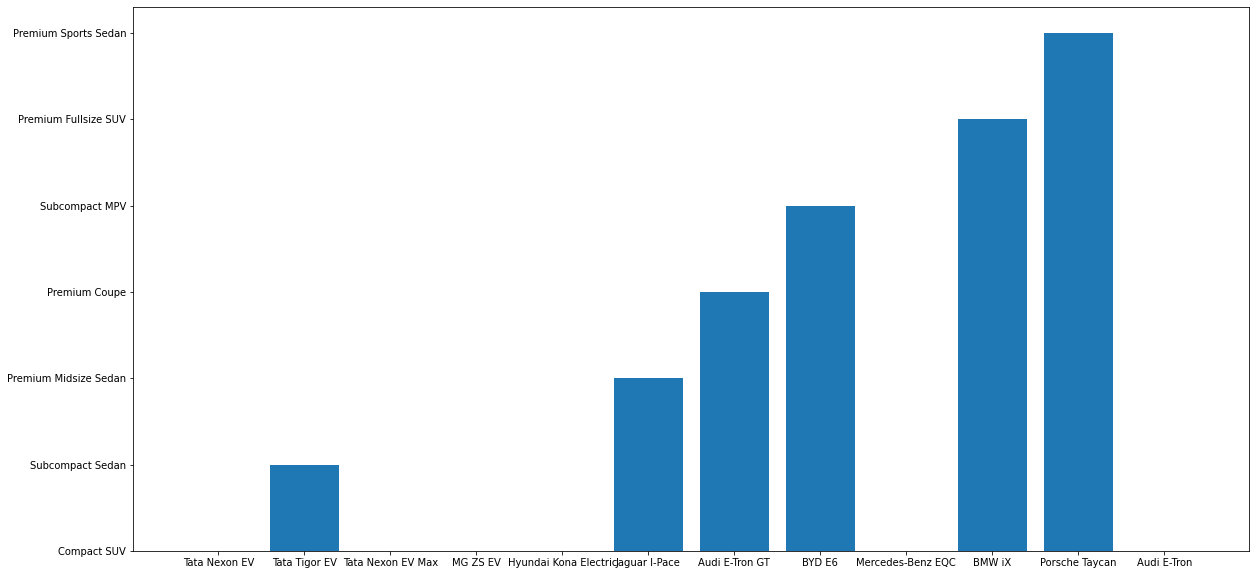

In [44]:
car = auto_data.Car
style = auto_data.Style
fig = plt.figure(figsize =(20,10))
plt.bar(car,style)

{'Compact SUV': 6, 'Subcompact Sedan': 1, 'Premium Midsize Sedan': 1, 'Premium Coupe': 1, 'Subcompact MPV': 1, 'Premium Fullsize SUV': 1, 'Premium Sports Sedan': 1}


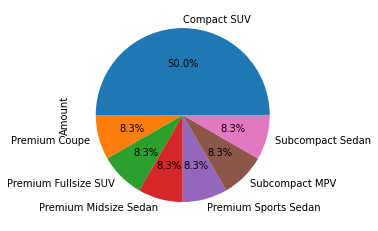

In [45]:
car = auto_data["Style"].value_counts().to_dict()
car_dataframe = pd.DataFrame(car.items(), columns=['Company', 'Amount'])
car_dataframe.groupby(['Company']).sum().plot(kind='pie', y='Amount' , legend=None , autopct='%1.1f%%')
print(car)

#style = auto_data.Style
#fig = plt.figure(figsize =(20,10))
#plt.pie(style)

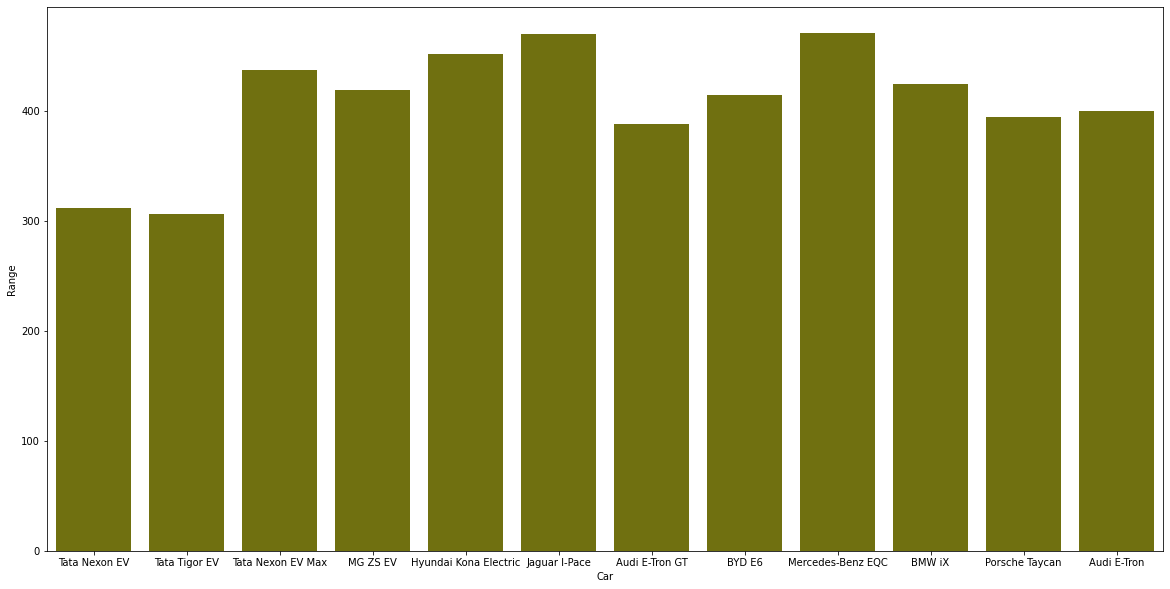

In [46]:
plt.figure(figsize=(20,10))

sns.barplot(x = 'Car',
            y = 'Range',
            color = 'olive',
            data = auto_data)
 
# Show the plot
plt.show()

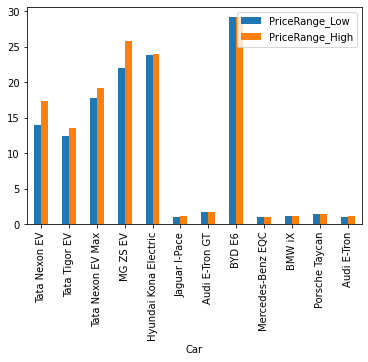

In [47]:
# plt.figure(figsize=(100,100))
auto_data.plot(x = 'Car',
            y = ['PriceRange_Low', 'PriceRange_High'],
            kind = 'bar'
            )